In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from stencilnet.finite_volume import dynamics
from stencilnet.numerics import integrator, rk4_step

In [2]:
def u0(x: jnp.ndarray, y: jnp.ndarray, type: str) -> jnp.ndarray:
    if type == "square":
        inside_square = jnp.logical_and(x > 0.25, x < 0.75)
        inside_square = jnp.logical_and(inside_square, y > 0.25)
        inside_square = jnp.logical_and(inside_square, y < 0.75)
        return jnp.where(inside_square, 1.0, 0.0)

In [3]:
# domain
n = 64
x_interface = jnp.linspace(0, 1, n + 1)
x_cell_center = 0.5 * (x_interface[1:] + x_interface[:-1])
x, y = jnp.meshgrid(x_cell_center, x_cell_center)
T = 1

# problem specs
u_init = u0(x, y, "square")
v = (2, 1)

# solver config
p = 3
cfl = 0.8
h = (1 / n, 1 / n)
dt = cfl / (v[0] / h[0] + v[1] / h[1])
n_steps = int(jnp.ceil(T // dt))

I0000 00:00:1706070295.455888       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [4]:
# execute solver
U = integrator(
    f=lambda u: dynamics(u, v=v, p=p, h=h),
    step=rk4_step,
    u_init=u_init,
    n_steps=n_steps,
    T=T,
)

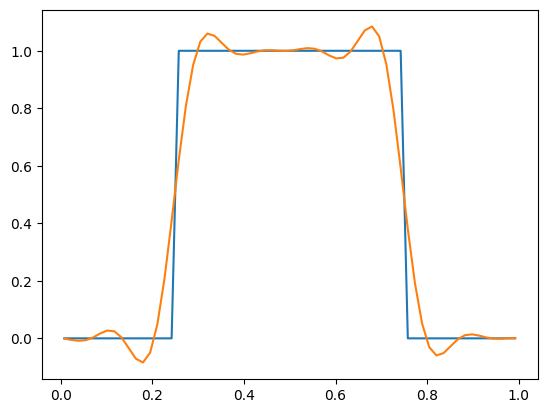

In [5]:
# plot
plt.plot(x[0], U[0, int(n / 2), :])
plt.plot(x[0], U[-1, int(n / 2), :])
plt.show()